In [86]:
# Declare all imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Set display option

from IPython.display import display
pd.options.display.max_columns = None

In [87]:
# Load data

loans = pd.read_csv(os.path.expanduser("loan.csv"), 
                 skipinitialspace=True, error_bad_lines=False, dtype='unicode')
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [89]:
# ----------------- Data cleaning ------------------------------------------------------

# Make a subset of data with driver variables to work on

loans = loans[['id', 'annual_inc', 'loan_amnt', 'funded_amnt', 'int_rate', 'grade', 'dti', 'emp_length', 'purpose', 'home_ownership', 'loan_status', 'addr_state']]
loans.head()

,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state
0,1077501,24000,5000,5000,10.65%,B,27.65,10+ years,credit_card,RENT,Fully Paid,AZ
1,1077430,30000,2500,2500,15.27%,C,1,< 1 year,car,RENT,Charged Off,GA
2,1077175,12252,2400,2400,15.96%,C,8.72,10+ years,small_business,RENT,Fully Paid,IL
3,1076863,49200,10000,10000,13.49%,C,20,10+ years,other,RENT,Fully Paid,CA
4,1075358,80000,3000,3000,12.69%,B,17.94,1 year,other,RENT,Current,OR


In [90]:
# ----------------- Data cleaning ------------------------------------------------------

# Check for null values

loans.isnull().sum()

id                   0
annual_inc           0
loan_amnt            0
funded_amnt          0
int_rate             0
grade                0
dti                  0
emp_length        1075
purpose              0
home_ownership       0
loan_status          0
addr_state           0
dtype: int64

In [91]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 12 columns):
id                39717 non-null object
annual_inc        39717 non-null object
loan_amnt         39717 non-null object
funded_amnt       39717 non-null object
int_rate          39717 non-null object
grade             39717 non-null object
dti               39717 non-null object
emp_length        38642 non-null object
purpose           39717 non-null object
home_ownership    39717 non-null object
loan_status       39717 non-null object
addr_state        39717 non-null object
dtypes: object(12)
memory usage: 3.6+ MB


In [92]:
# Drop rows with null values

loans = loans.dropna()
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 12 columns):
id                38642 non-null object
annual_inc        38642 non-null object
loan_amnt         38642 non-null object
funded_amnt       38642 non-null object
int_rate          38642 non-null object
grade             38642 non-null object
dti               38642 non-null object
emp_length        38642 non-null object
purpose           38642 non-null object
home_ownership    38642 non-null object
loan_status       38642 non-null object
addr_state        38642 non-null object
dtypes: object(12)
memory usage: 3.8+ MB


In [93]:
# There are no rows with null values

loans.isnull().sum()

id                0
annual_inc        0
loan_amnt         0
funded_amnt       0
int_rate          0
grade             0
dti               0
emp_length        0
purpose           0
home_ownership    0
loan_status       0
addr_state        0
dtype: int64

In [94]:
# convert emp_length   to numeric

mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0

    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loans = loans.replace(mapping_dict)
loans['emp_length'].value_counts()


10    8879
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [95]:
# Convert all non-numeric values to upper case

loans = loans.apply(lambda x: x.astype(str).str.upper())
loans.head()

,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state
0,1077501,24000,5000,5000,10.65%,2,27.65,10,CREDIT_CARD,RENT,FULLY PAID,AZ
1,1077430,30000,2500,2500,15.27%,3,1,0,CAR,RENT,CHARGED OFF,GA
2,1077175,12252,2400,2400,15.96%,3,8.72,10,SMALL_BUSINESS,RENT,FULLY PAID,IL
3,1076863,49200,10000,10000,13.49%,3,20,10,OTHER,RENT,FULLY PAID,CA
4,1075358,80000,3000,3000,12.69%,2,17.94,1,OTHER,RENT,CURRENT,OR


In [96]:
# Trim leading and trailing spaces in all non-numeric columns

loans = loans.apply(lambda x: x.astype(str).str.strip())
loans.head()

,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state
0,1077501,24000,5000,5000,10.65%,2,27.65,10,CREDIT_CARD,RENT,FULLY PAID,AZ
1,1077430,30000,2500,2500,15.27%,3,1,0,CAR,RENT,CHARGED OFF,GA
2,1077175,12252,2400,2400,15.96%,3,8.72,10,SMALL_BUSINESS,RENT,FULLY PAID,IL
3,1076863,49200,10000,10000,13.49%,3,20,10,OTHER,RENT,FULLY PAID,CA
4,1075358,80000,3000,3000,12.69%,2,17.94,1,OTHER,RENT,CURRENT,OR


In [97]:
# Remove % from int_rate and convert to numeric

loans['int_rate'] = loans['int_rate'].str.split('%').str[0]
loans['int_rate'] = pd.to_numeric(loans['int_rate'])
loans.head()


# ----------------------- Data cleaning ends here -----------------------------------

,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state
0,1077501,24000,5000,5000,10.65,2,27.65,10,CREDIT_CARD,RENT,FULLY PAID,AZ
1,1077430,30000,2500,2500,15.27,3,1,0,CAR,RENT,CHARGED OFF,GA
2,1077175,12252,2400,2400,15.96,3,8.72,10,SMALL_BUSINESS,RENT,FULLY PAID,IL
3,1076863,49200,10000,10000,13.49,3,20,10,OTHER,RENT,FULLY PAID,CA
4,1075358,80000,3000,3000,12.69,2,17.94,1,OTHER,RENT,CURRENT,OR


In [98]:
#Converting funded_amnt from object to numeric to get the summary statistics and analyse it accordingly

loans['funded_amnt'] = pd.to_numeric(loans['funded_amnt'])
loans['grade'] = pd.to_numeric(loans['grade'])
loans.head()

,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state
0,1077501,24000,5000,5000,10.65,2,27.65,10,CREDIT_CARD,RENT,FULLY PAID,AZ
1,1077430,30000,2500,2500,15.27,3,1,0,CAR,RENT,CHARGED OFF,GA
2,1077175,12252,2400,2400,15.96,3,8.72,10,SMALL_BUSINESS,RENT,FULLY PAID,IL
3,1076863,49200,10000,10000,13.49,3,20,10,OTHER,RENT,FULLY PAID,CA
4,1075358,80000,3000,3000,12.69,2,17.94,1,OTHER,RENT,CURRENT,OR


In [99]:
#Converting loan_amnt from object to numeric to get the summary statisticsand analyse it accordingly

loans['loan_amnt'] = pd.to_numeric(loans['loan_amnt'])
loans.head()

,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state
0,1077501,24000,5000,5000,10.65,2,27.65,10,CREDIT_CARD,RENT,FULLY PAID,AZ
1,1077430,30000,2500,2500,15.27,3,1,0,CAR,RENT,CHARGED OFF,GA
2,1077175,12252,2400,2400,15.96,3,8.72,10,SMALL_BUSINESS,RENT,FULLY PAID,IL
3,1076863,49200,10000,10000,13.49,3,20,10,OTHER,RENT,FULLY PAID,CA
4,1075358,80000,3000,3000,12.69,2,17.94,1,OTHER,RENT,CURRENT,OR


In [100]:
#Converting dti from object to numeric to get the summary statisticsand analyse it accordingly

loans['dti'] = pd.to_numeric(loans['dti'])
loans.head()

,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state
0,1077501,24000,5000,5000,10.65,2,27.65,10,CREDIT_CARD,RENT,FULLY PAID,AZ
1,1077430,30000,2500,2500,15.27,3,1.00,0,CAR,RENT,CHARGED OFF,GA
2,1077175,12252,2400,2400,15.96,3,8.72,10,SMALL_BUSINESS,RENT,FULLY PAID,IL
3,1076863,49200,10000,10000,13.49,3,20.00,10,OTHER,RENT,FULLY PAID,CA
4,1075358,80000,3000,3000,12.69,2,17.94,1,OTHER,RENT,CURRENT,OR


In [17]:
# -------------------------- Data cleaning ends here ------------------------

In [101]:
# Since we are interested in analyzing the charged off/delinquent customers, 
# subsetting the data for rows which are not fully paid 

loans = loans[loans.loan_status != 'FULLY PAID']
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1 to 39688
Data columns (total 12 columns):
id                6497 non-null object
annual_inc        6497 non-null object
loan_amnt         6497 non-null int64
funded_amnt       6497 non-null int64
int_rate          6497 non-null float64
grade             6497 non-null int64
dti               6497 non-null float64
emp_length        6497 non-null object
purpose           6497 non-null object
home_ownership    6497 non-null object
loan_status       6497 non-null object
addr_state        6497 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 659.9+ KB


In [102]:
loans.describe()

,loan_amnt,funded_amnt,int_rate,grade,dti
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,13078.694013,12682.892104,14.087682,3.277513,14.105636
std,8389.886250,8028.242352,3.656936,1.451316,6.604597
min,900.000000,900.000000,5.420000,1.000000,0.000000
25%,6000.000000,6000.000000,11.490000,2.000000,9.170000
50%,12000.000000,11400.000000,13.850000,3.000000,14.400000
75%,18000.000000,17750.000000,16.770000,4.000000,19.370000
max,35000.000000,35000.000000,24.590000,7.000000,29.950000


In [103]:
# Remove outliers in annual inc
loans.info()
loans.annual_inc = pd.to_numeric(loans.annual_inc, errors='coerce')
outliers = loans[loans['annual_inc'] > loans['annual_inc'].mean() + 3 * loans['annual_inc'].std()]
print(len(outliers.index.tolist()))
loans = loans.drop(outliers.index.tolist())
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1 to 39688
Data columns (total 12 columns):
id                6497 non-null object
annual_inc        6497 non-null object
loan_amnt         6497 non-null int64
funded_amnt       6497 non-null int64
int_rate          6497 non-null float64
grade             6497 non-null int64
dti               6497 non-null float64
emp_length        6497 non-null object
purpose           6497 non-null object
home_ownership    6497 non-null object
loan_status       6497 non-null object
addr_state        6497 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 659.9+ KB
70
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 1 to 39688
Data columns (total 12 columns):
id                6427 non-null object
annual_inc        6427 non-null float64
loan_amnt         6427 non-null int64
funded_amnt       6427 non-null int64
int_rate          6427 non-null float64
grade             6427 non-null int64
dti              

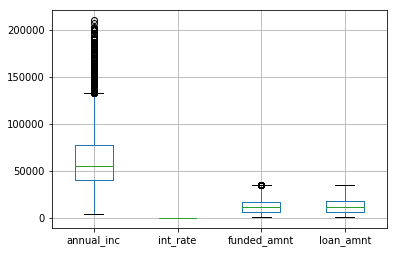

In [104]:
#Checking for outliers among all the numeric variables
loans.boxplot(column=['annual_inc','int_rate','funded_amnt','loan_amnt'])

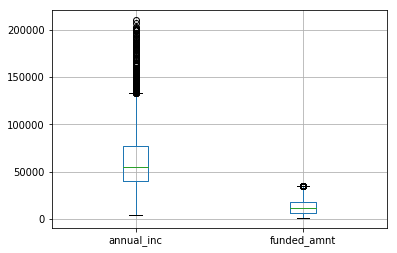

In [105]:
#Outliers in annual_inc and funded_amnt

loans.boxplot(column=['annual_inc','funded_amnt'])

In [106]:
#Removing outliers in annual income by changing the standard deviation value from 3 to 2

outliers = loans[loans['annual_inc'] > loans['annual_inc'].mean() + 2 * loans['annual_inc'].std()]
print(len(outliers.index.tolist()))
loans = loans.drop(outliers.index.tolist())
loans.info()

321
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6106 entries, 1 to 39678
Data columns (total 12 columns):
id                6106 non-null object
annual_inc        6106 non-null float64
loan_amnt         6106 non-null int64
funded_amnt       6106 non-null int64
int_rate          6106 non-null float64
grade             6106 non-null int64
dti               6106 non-null float64
emp_length        6106 non-null object
purpose           6106 non-null object
home_ownership    6106 non-null object
loan_status       6106 non-null object
addr_state        6106 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 620.1+ KB


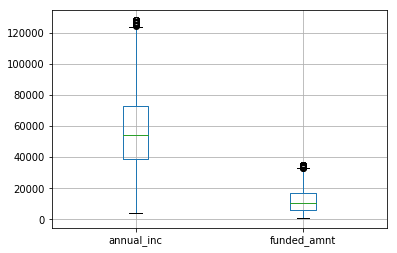

In [107]:
#Checking again for outliers in annual income and funded amount

loans.boxplot(column=['annual_inc','funded_amnt'])

In [108]:
#Removing outliers in funded amount by resucing the standard deviation from 3 to 2.

outliers = loans[loans['funded_amnt'] > loans['funded_amnt'].mean() + 2 * loans['funded_amnt'].std()]
print(len(outliers.index.tolist()))
loans = loans.drop(outliers.index.tolist())
loans.info()

261
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5845 entries, 1 to 39678
Data columns (total 12 columns):
id                5845 non-null object
annual_inc        5845 non-null float64
loan_amnt         5845 non-null int64
funded_amnt       5845 non-null int64
int_rate          5845 non-null float64
grade             5845 non-null int64
dti               5845 non-null float64
emp_length        5845 non-null object
purpose           5845 non-null object
home_ownership    5845 non-null object
loan_status       5845 non-null object
addr_state        5845 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 593.6+ KB


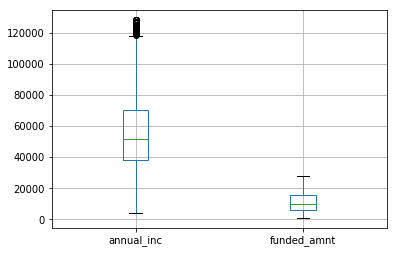

In [109]:
#Checking for outliers in funded amount 
loans.boxplot(column=['annual_inc','funded_amnt'])

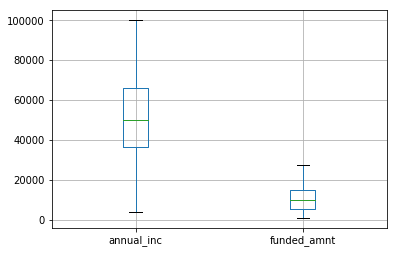

In [110]:
#Remove Annual Income Outliers
loans = loans[loans["annual_inc"] < 100000]
loans.boxplot(column=['annual_inc','funded_amnt'])

In [111]:
#Summary Statistics of continuos variables

loans.describe()

,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti
count,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000,5464.000000
mean,52319.387377,11373.201867,11034.169107,13.832319,3.181369,14.332182
std,20124.500941,6846.289140,6431.335290,3.577530,1.414036,6.634529
min,4080.000000,900.000000,900.000000,5.420000,1.000000,0.000000
25%,36500.000000,5793.750000,5600.000000,11.480000,2.000000,9.432500
50%,50000.000000,10000.000000,10000.000000,13.490000,3.000000,14.680000
75%,66000.000000,16000.000000,15037.500000,16.450000,4.000000,19.730000
max,99999.000000,35000.000000,27700.000000,24.400000,7.000000,29.950000


In [112]:
loans['emp_length'].value_counts()
loans['emp_length'] = pd.to_numeric(loans['emp_length'])
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5464 entries, 1 to 39678
Data columns (total 12 columns):
id                5464 non-null object
annual_inc        5464 non-null float64
loan_amnt         5464 non-null int64
funded_amnt       5464 non-null int64
int_rate          5464 non-null float64
grade             5464 non-null int64
dti               5464 non-null float64
emp_length        5464 non-null int64
purpose           5464 non-null object
home_ownership    5464 non-null object
loan_status       5464 non-null object
addr_state        5464 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 554.9+ KB


In [113]:
#Binning of all the continuos variables

loans['int_rate_range'] = pd.cut(loans.int_rate,[0,15,30],labels=["low(0-15)" , "high(15-30)"])
loans['dti_range'] = pd.cut(loans.dti,[0,10,20,30],labels=["low(0-10)" , "medium(10-20)" , "high(20-30)"])
loans['loan_amnt_range'] = pd.cut(loans.loan_amnt,[0,12000,24000,35000],labels=["low(0-12000)" , "medium(12000-24000)" , "high(24000-35000)"])
loans['annual_inc_range'] = pd.cut(loans.annual_inc,[0,30000,60000,90000],labels=["low(0-30000)" , "medium(30000-60000)" , "high(60000-90000)"])
loans['funded_amnt_range'] = pd.cut(loans.funded_amnt,[0,10000,20000,30000],labels=["low(0-10000)" , "medium(10000-20000)" , "high(20000-30000)"])
loans['emp_length_range'] = pd.cut(loans.emp_length,[0,3,6,10], labels=["low(0-3)", "medium(4-6)", "high(7-10)"])


# Univariate Analysis

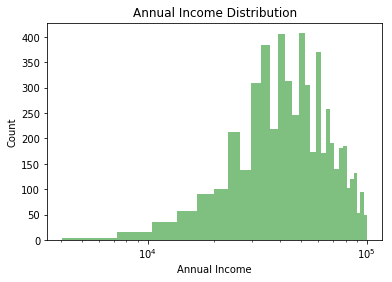

In [114]:
#Annual Income Distribution

plt.hist(loans.annual_inc, 30 ,facecolor='g', alpha=0.5)
plt.xscale('log')
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.title("Annual Income Distribution")

plt.show()

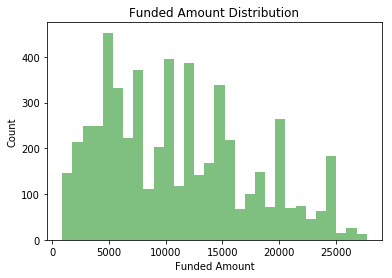

In [115]:
#Funded Amount Distribution

plt.hist(loans.funded_amnt,30,facecolor='g', alpha=0.5)
plt.xlabel("Funded Amount")
plt.ylabel("Count")
plt.title("Funded Amount Distribution")

plt.show()

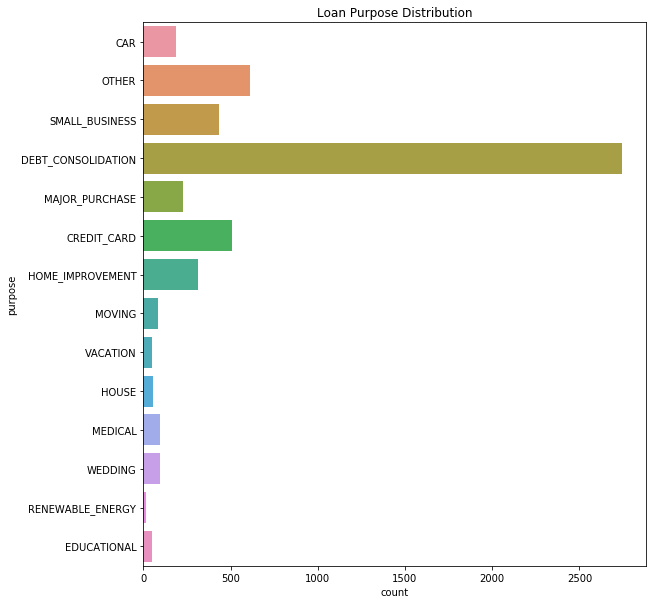

In [116]:
# plot purpose vs count of charged off loans (and current loans as well)

plt.figure(figsize=(9,10))
sns.countplot(y = "purpose" , data = loans)
plt.title("Loan Purpose Distribution")
plt.show()

Text(0.5,1,'Home Ownership Distribution')

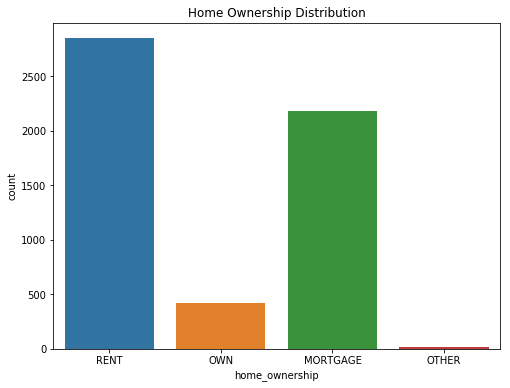

In [117]:
# plot home ownership vs count of charged off loans (and current loans as well)


plt.figure(figsize=(8, 6))
sns.countplot(loans['home_ownership'])
plt.title("Home Ownership Distribution")

Text(0.5,1,'Loan Grade Distribution')

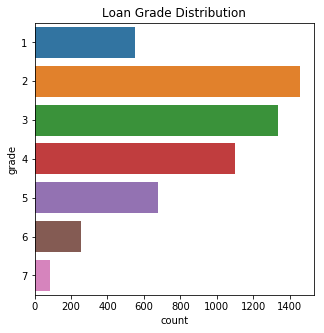

In [118]:
plt.figure(figsize=(5,5))
sns.countplot(y = "grade" , data = loans)
plt.title("Loan Grade Distribution")

Text(0.5,1,'Address State Distribution')

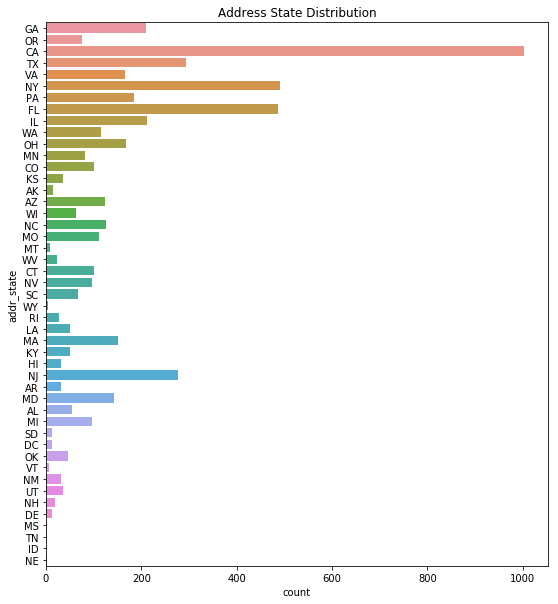

In [119]:
#plot address state vs count of charged off loans


plt.figure(figsize=(9,10))
sns.countplot(y = "addr_state" , data = loans)
plt.title("Address State Distribution")

Text(0.5,1,'Employer Length Distribution')

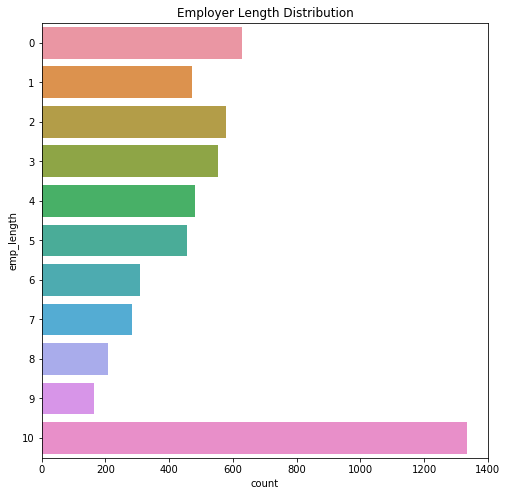

In [120]:
plt.figure(figsize=(8,8))
sns.countplot(y = "emp_length" , data = loans)
plt.title("Employer Length Distribution")

# Univariate Analysis : Binning Variables

Text(0.5,1,'Annual Income Range')

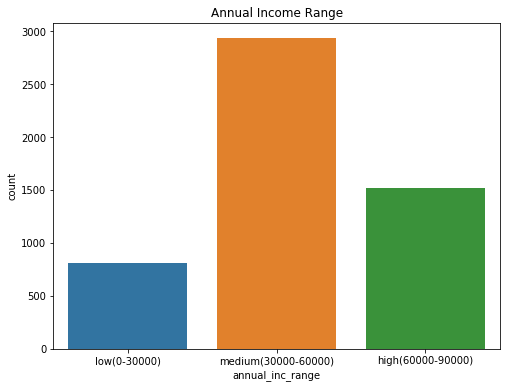

In [121]:
#Binned annual income analysis

plt.figure(figsize=(8,6))
sns.countplot(loans['annual_inc_range'])
plt.title("Annual Income Range")

Text(0.5,1,'Loan Amount Range')

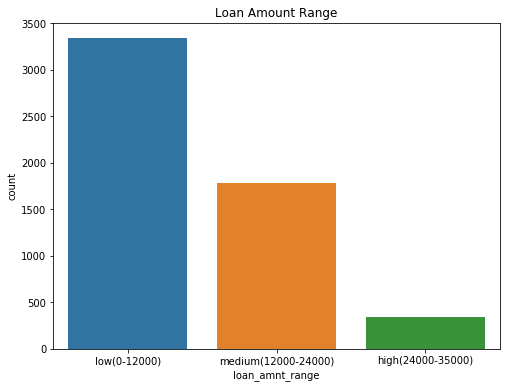

In [122]:
#Binned loan amount analysis
plt.figure(figsize=(8,6))
sns.countplot(loans['loan_amnt_range'])
plt.title("Loan Amount Range")

Text(0.5,1,'Funded Amount Range')

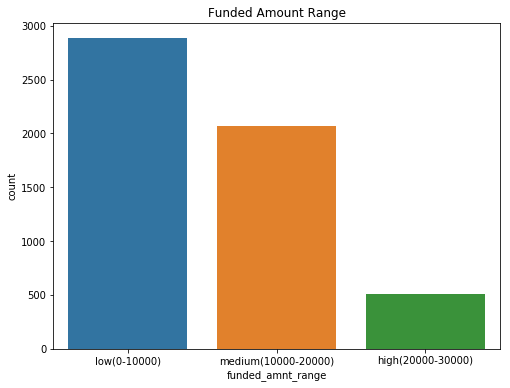

In [123]:
#Binned funded amount analysis
plt.figure(figsize=(8,6))
sns.countplot(loans['funded_amnt_range'])
plt.title("Funded Amount Range")

Text(0.5,1,'Interest Rate Range')

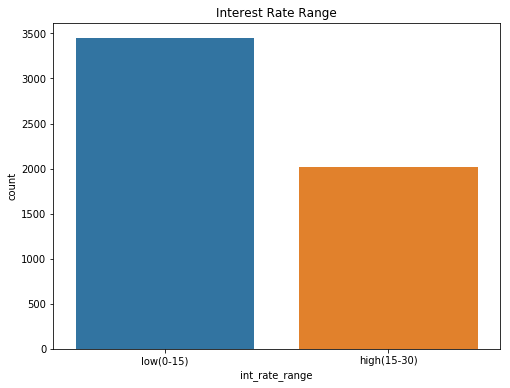

In [124]:
#Binned interest rate analysis
plt.figure(figsize=(8,6))
sns.countplot(loans['int_rate_range'])
plt.title("Interest Rate Range")

Text(0.5,1,'Dti Range')

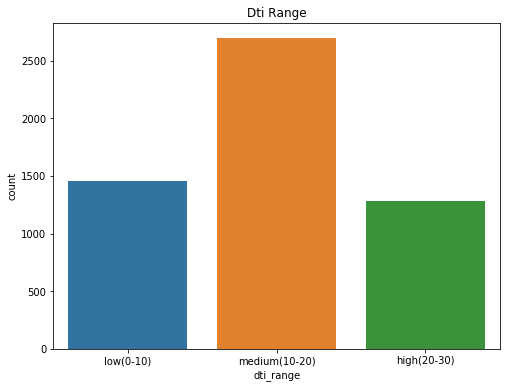

In [125]:
#Binned dti analysis
plt.figure(figsize=(8,6))
sns.countplot(loans['dti_range'])
plt.title("Dti Range")

# Multivariate Analysis

/Users/abhidas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between Funded Amount and Loan Amount')

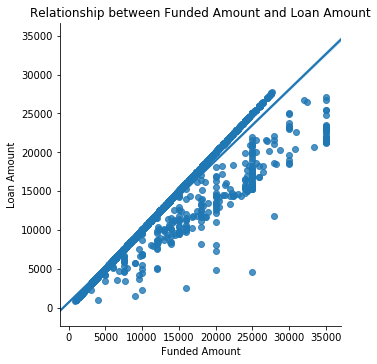

In [126]:
#Bivariate analysis of loan_amnt and funded_amnt
sns.lmplot("loan_amnt", "funded_amnt", loans)
plt.xlabel("Funded Amount")
plt.ylabel("Loan Amount")
plt.title("Relationship between Funded Amount and Loan Amount")

/Users/abhidas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


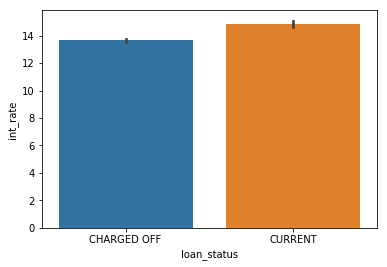

In [127]:
sns.barplot(x='loan_status', y = 'int_rate' , data=loans)

# Correlation

In [128]:
#Correlation among the variables

corrmat = loans.corr()
corrmat


,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length
annual_inc,1.000000,0.405902,0.400352,0.118180,0.104970,-0.001577,0.231511
loan_amnt,0.405902,1.000000,0.972534,0.273410,0.241530,0.116816,0.197004
funded_amnt,0.400352,0.972534,1.000000,0.281277,0.246278,0.117405,0.203043
int_rate,0.118180,0.273410,0.281277,1.000000,0.942213,0.033694,0.021722
grade,0.104970,0.241530,0.246278,0.942213,1.000000,0.008653,0.000762
dti,-0.001577,0.116816,0.117405,0.033694,0.008653,1.000000,0.084195
emp_length,0.231511,0.197004,0.203043,0.021722,0.000762,0.084195,1.000000


In [129]:
#Correlation Matrix 

plt.figure(figsize=(12, 8))
corrmat.style.background_gradient(cmap='BuGn',low=1, high=1).set_precision(2)


,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length
annual_inc,1,0.41,0.4,0.12,0.1,-0.0016,0.23
loan_amnt,0.41,1,0.97,0.27,0.24,0.12,0.2
funded_amnt,0.4,0.97,1,0.28,0.25,0.12,0.2
int_rate,0.12,0.27,0.28,1,0.94,0.034,0.022
grade,0.1,0.24,0.25,0.94,1,0.0087,0.00076
dti,-0.0016,0.12,0.12,0.034,0.0087,1,0.084
emp_length,0.23,0.2,0.2,0.022,0.00076,0.084,1


<Figure size 864x576 with 0 Axes>

/Users/abhidas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between dti and Funded Amount ')

<Figure size 576x432 with 0 Axes>

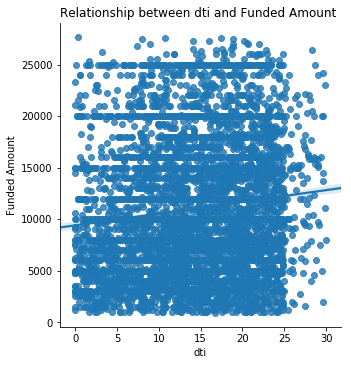

In [130]:
#Bivariate analysis of dti and funded_amnt
plt.figure(figsize=(8,6))

sns.lmplot("dti", "funded_amnt", loans)
plt.xlabel("dti")
plt.ylabel("Funded Amount")
plt.title("Relationship between dti and Funded Amount ")

In [131]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5464 entries, 1 to 39678
Data columns (total 18 columns):
id                   5464 non-null object
annual_inc           5464 non-null float64
loan_amnt            5464 non-null int64
funded_amnt          5464 non-null int64
int_rate             5464 non-null float64
grade                5464 non-null int64
dti                  5464 non-null float64
emp_length           5464 non-null int64
purpose              5464 non-null object
home_ownership       5464 non-null object
loan_status          5464 non-null object
addr_state           5464 non-null object
int_rate_range       5464 non-null category
dti_range            5434 non-null category
loan_amnt_range      5464 non-null category
annual_inc_range     5262 non-null category
funded_amnt_range    5464 non-null category
emp_length_range     4837 non-null category
dtypes: category(6), float64(3), int64(4), object(5)
memory usage: 747.6+ KB


/Users/abhidas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between Annual Income and Funded Amount ')

<Figure size 576x432 with 0 Axes>

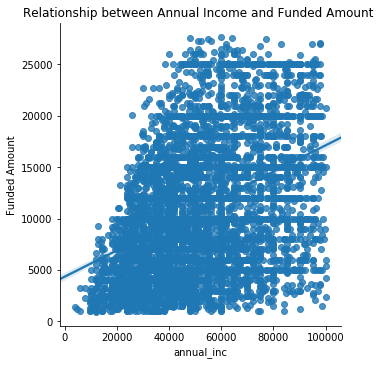

In [132]:
#Bivariate analysis of annual_inc and funded_amnt
plt.figure(figsize=(8,6))

sns.lmplot("annual_inc", "funded_amnt", loans)
plt.xlabel("annual_inc")
plt.ylabel("Funded Amount")
plt.title("Relationship between Annual Income and Funded Amount ")

/Users/abhidas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between Annual Income and Interest Rate ')

<Figure size 576x432 with 0 Axes>

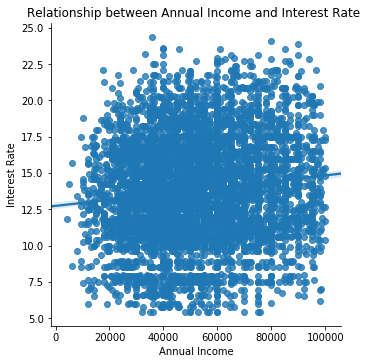

In [133]:
#Bivariate analysis of annual_inc and int_rate
plt.figure(figsize=(8,6))

sns.lmplot("annual_inc", "int_rate", loans)
plt.xlabel("Annual Income")
plt.ylabel("Interest Rate")
plt.title("Relationship between Annual Income and Interest Rate ")

/Users/abhidas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between Emp Length and Annual Income ')

<Figure size 576x432 with 0 Axes>

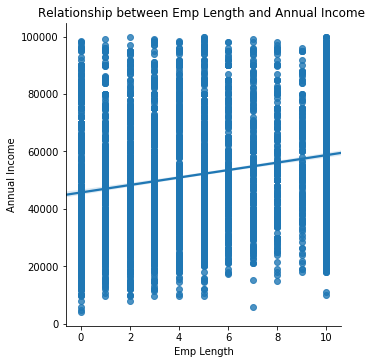

In [134]:
#Bivariate analysis of emp_length and annual_inc
plt.figure(figsize=(8,6))

sns.lmplot("emp_length", "annual_inc", loans)
plt.xlabel("Emp Length")
plt.ylabel("Annual Income")
plt.title("Relationship between Emp Length and Annual Income ")


/Users/abhidas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between dti and Loan Amount')

<Figure size 576x432 with 0 Axes>

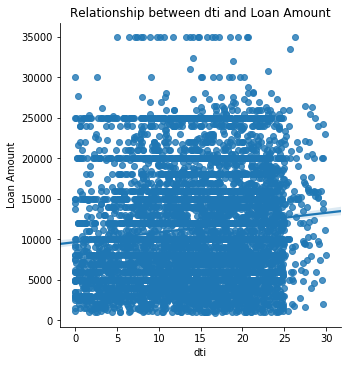

In [135]:
#Bivariate analysis of loan_amnt and dti
plt.figure(figsize=(8,6))


sns.lmplot("dti", "loan_amnt", loans)
plt.xlabel("dti")
plt.ylabel("Loan Amount")
plt.title("Relationship between dti and Loan Amount")

/Users/abhidas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between Emp Length and Loan Amount')

<Figure size 576x432 with 0 Axes>

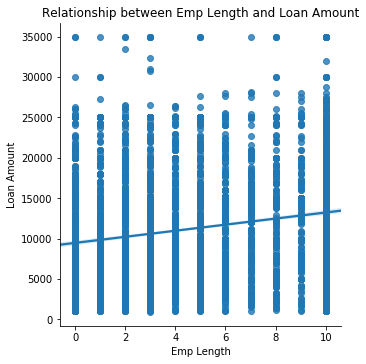

In [136]:
#Bivariate analysis of Emp Length and loan_amnt
plt.figure(figsize=(8,6))


sns.lmplot("emp_length", "loan_amnt", loans)
plt.xlabel("Emp Length")
plt.ylabel("Loan Amount")
plt.title("Relationship between Emp Length and Loan Amount")

/Users/abhidas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between Interest Rate and Funded Amount')

<Figure size 576x432 with 0 Axes>

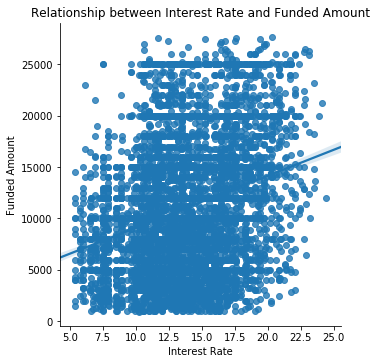

In [137]:
#Bivariate analysis of Interest rate and funded_amnt
plt.figure(figsize=(8,6))

sns.lmplot("int_rate", "funded_amnt", loans)
plt.xlabel("Interest Rate")
plt.ylabel("Funded Amount")
plt.title("Relationship between Interest Rate and Funded Amount")

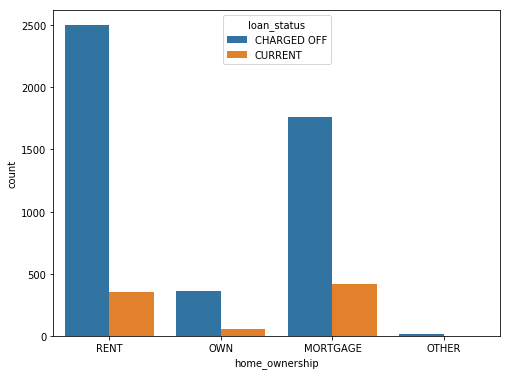

In [138]:
plt.figure(figsize=(8,6))
sns.countplot(x="home_ownership", hue="loan_status", data=loans)

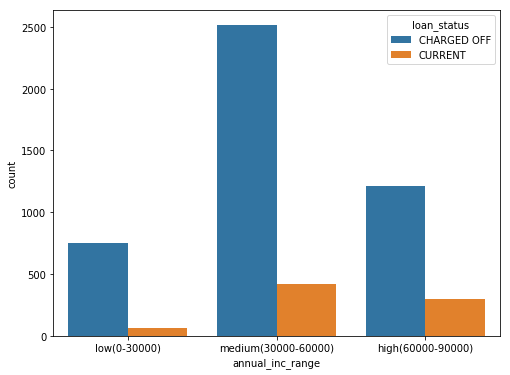

In [139]:
plt.figure(figsize=(8,6))
sns.countplot(x="annual_inc_range", hue="loan_status", data=loans)

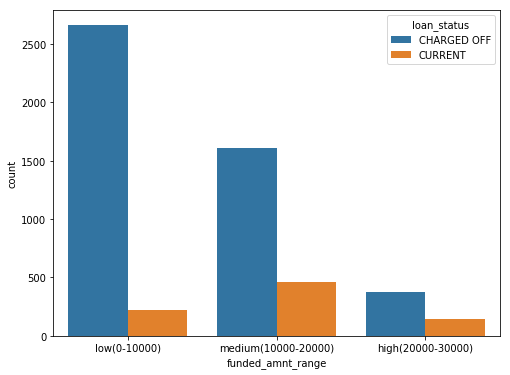

In [140]:
plt.figure(figsize=(8,6))
sns.countplot(x="funded_amnt_range", hue="loan_status", data=loans)

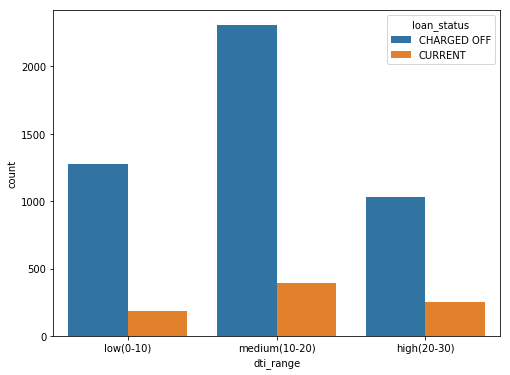

In [141]:
plt.figure(figsize=(8,6))
sns.countplot(x="dti_range", hue="loan_status", data=loans)

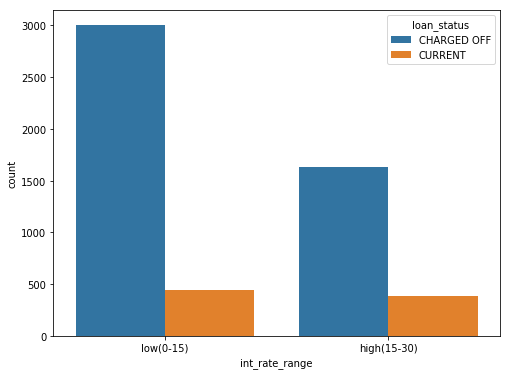

In [142]:
plt.figure(figsize=(8,6))
sns.countplot(x="int_rate_range", hue="loan_status", data=loans)

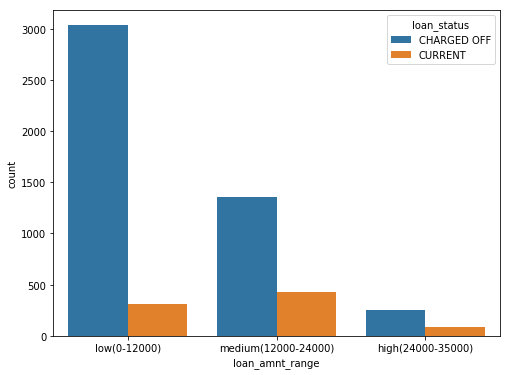

In [143]:
plt.figure(figsize=(8,6))
sns.countplot(x="loan_amnt_range", hue="loan_status", data=loans)

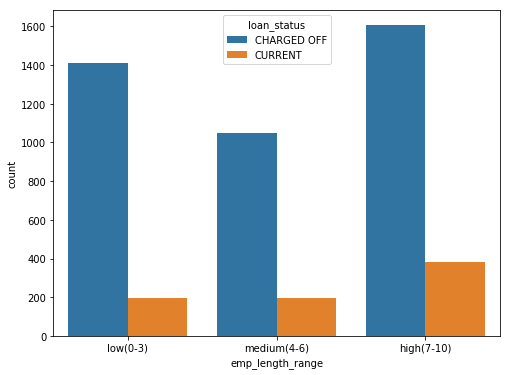

In [144]:
plt.figure(figsize=(8,6))
sns.countplot(x="emp_length_range", hue="loan_status", data=loans)

In [145]:
loans_1 = loans.loc[loans.loan_status == 'CURRENT']
loans_2 = loans.loc[loans.loan_status == 'CHARGED OFF']
loans_2.info()
loans.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4635 entries, 1 to 39678
Data columns (total 18 columns):
id                   4635 non-null object
annual_inc           4635 non-null float64
loan_amnt            4635 non-null int64
funded_amnt          4635 non-null int64
int_rate             4635 non-null float64
grade                4635 non-null int64
dti                  4635 non-null float64
emp_length           4635 non-null int64
purpose              4635 non-null object
home_ownership       4635 non-null object
loan_status          4635 non-null object
addr_state           4635 non-null object
int_rate_range       4635 non-null category
dti_range            4610 non-null category
loan_amnt_range      4635 non-null category
annual_inc_range     4479 non-null category
funded_amnt_range    4635 non-null category
emp_length_range     4066 non-null category
dtypes: category(6), float64(3), int64(4), object(5)
memory usage: 498.5+ KB


,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state,int_rate_range,dti_range,loan_amnt_range,annual_inc_range,funded_amnt_range,emp_length_range
1,1077430,30000.0,2500,2500,15.27,3,1.00,0,CAR,RENT,CHARGED OFF,GA,high(15-30),low(0-10),low(0-12000),low(0-30000),low(0-10000),NaN
4,1075358,80000.0,3000,3000,12.69,2,17.94,1,OTHER,RENT,CURRENT,OR,low(0-15),medium(10-20),low(0-12000),high(60000-90000),low(0-10000),low(0-3)
8,1071795,40000.0,5600,5600,21.28,6,5.55,4,SMALL_BUSINESS,OWN,CHARGED OFF,CA,high(15-30),low(0-10),low(0-12000),medium(30000-60000),low(0-10000),medium(4-6)
9,1071570,15000.0,5375,5375,12.69,2,18.08,0,OTHER,RENT,CHARGED OFF,TX,low(0-15),medium(10-20),low(0-12000),low(0-30000),low(0-10000),NaN
12,1064687,30000.0,9000,9000,13.49,3,10.08,0,DEBT_CONSOLIDATION,RENT,CHARGED OFF,VA,low(0-15),medium(10-20),low(0-12000),low(0-30000),low(0-10000),NaN


In [146]:
loans_1.set_index('loan_status')
loans_2.set_index('loan_status')


,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,addr_state,int_rate_range,dti_range,loan_amnt_range,annual_inc_range,funded_amnt_range,emp_length_range
loan_status,,,,,,,,,,,,,,,,,
CHARGED OFF,1077430,30000.0,2500,2500,15.27,3,1.00,0,CAR,RENT,GA,high(15-30),low(0-10),low(0-12000),low(0-30000),low(0-10000),NaN
CHARGED OFF,1071795,40000.0,5600,5600,21.28,6,5.55,4,SMALL_BUSINESS,OWN,CA,high(15-30),low(0-10),low(0-12000),medium(30000-60000),low(0-10000),medium(4-6)
CHARGED OFF,1071570,15000.0,5375,5375,12.69,2,18.08,0,OTHER,RENT,TX,low(0-15),medium(10-20),low(0-12000),low(0-30000),low(0-10000),NaN
CHARGED OFF,1064687,30000.0,9000,9000,13.49,3,10.08,0,DEBT_CONSOLIDATION,RENT,VA,low(0-15),medium(10-20),low(0-12000),low(0-30000),low(0-10000),NaN
CHARGED OFF,1069559,76000.0,6000,6000,11.71,2,2.40,1,MAJOR_PURCHASE,RENT,CA,low(0-15),low(0-10),low(0-12000),high(60000-90000),low(0-10000),low(0-3)
CHARGED OFF,1069800,60000.0,15000,15000,14.27,3,15.22,9,DEBT_CONSOLIDATION,RENT,NY,low(0-15),medium(10-20),medium(12000-24000),medium(30000-60000),medium(10000-20000),high(7-10)
CHARGED OFF,1069657,50004.0,5000,5000,16.77,4,13.97,2,OTHER,RENT,PA,high(15-30),medium(10-20),low(0-12000),medium(30000-60000),low(0-10000),low(0-3)
CHARGED OFF,1069248,80000.0,15000,15000,9.91,2,9.12,8,DEBT_CONSOLIDATION,MORTGAGE,IL,low(0-15),low(0-10),medium(12000-24000),high(60000-90000),medium(10000-20000),high(7-10)
CHARGED OFF,1069243,50000.0,12000,12000,15.96,3,20.88,4,CAR,RENT,CA,high(15-30),high(20-30),low(0-12000),medium(30000-60000),medium(10000-20000),medium(4-6)


In [147]:
#Null Hypothesis = Uo - Ui = 0, 
#Z-score is 1.65 for 95%

from scipy.stats import ttest_ind

print(ttest_ind(loans_1['annual_inc'], loans_2['annual_inc'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(loans_1['loan_amnt'], loans_2['loan_amnt'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(loans_1['funded_amnt'], loans_2['funded_amnt'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(loans_1['grade'], loans_2['grade'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(loans_1['dti'], loans_2['dti'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(loans_1['emp_length'], loans_2['emp_length'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(loans_1['int_rate'], loans_2['int_rate'], equal_var = 'equal_variance', nan_policy = 'omit'))


Ttest_indResult(statistic=9.677566518123744, pvalue=5.632843185110291e-22)
Ttest_indResult(statistic=15.37842517611152, pvalue=2.809626771579846e-52)
Ttest_indResult(statistic=15.54721350953245, pvalue=2.2813928478030674e-53)
Ttest_indResult(statistic=3.139918831826274, pvalue=0.0016989626173404657)
Ttest_indResult(statistic=4.946402762521937, pvalue=7.786225398618782e-07)
Ttest_indResult(statistic=7.040443523649062, pvalue=2.152542567127713e-12)
Ttest_indResult(statistic=8.906163521849622, pvalue=7.077046942336863e-19)


In [148]:
loans.int_rate_range.value_counts()

low(0-15)      3446
high(15-30)    2018
Name: int_rate_range, dtype: int64

In [149]:
loans.int_rate_range.value_counts()
int_loans_1 = loans.loc[loans.int_rate_range == 'low(0-15)']
int_loans_2 = loans.loc[loans.int_rate_range == 'high(15-30)']

int_loans_1.head()

,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state,int_rate_range,dti_range,loan_amnt_range,annual_inc_range,funded_amnt_range,emp_length_range
4,1075358,80000.0,3000,3000,12.69,2,17.94,1,OTHER,RENT,CURRENT,OR,low(0-15),medium(10-20),low(0-12000),high(60000-90000),low(0-10000),low(0-3)
9,1071570,15000.0,5375,5375,12.69,2,18.08,0,OTHER,RENT,CHARGED OFF,TX,low(0-15),medium(10-20),low(0-12000),low(0-30000),low(0-10000),NaN
12,1064687,30000.0,9000,9000,13.49,3,10.08,0,DEBT_CONSOLIDATION,RENT,CHARGED OFF,VA,low(0-15),medium(10-20),low(0-12000),low(0-30000),low(0-10000),NaN
24,1069559,76000.0,6000,6000,11.71,2,2.40,1,MAJOR_PURCHASE,RENT,CHARGED OFF,CA,low(0-15),low(0-10),low(0-12000),high(60000-90000),low(0-10000),low(0-3)
26,1069800,60000.0,15000,15000,14.27,3,15.22,9,DEBT_CONSOLIDATION,RENT,CHARGED OFF,NY,low(0-15),medium(10-20),medium(12000-24000),medium(30000-60000),medium(10000-20000),high(7-10)


In [150]:
int_loans_1.set_index('int_rate_range')
int_loans_2.set_index('int_rate_range')

,id,annual_inc,loan_amnt,funded_amnt,int_rate,grade,dti,emp_length,purpose,home_ownership,loan_status,addr_state,dti_range,loan_amnt_range,annual_inc_range,funded_amnt_range,emp_length_range
int_rate_range,,,,,,,,,,,,,,,,,
high(15-30),1077430,30000.00,2500,2500,15.27,3,1.00,0,CAR,RENT,CHARGED OFF,GA,low(0-10),low(0-12000),low(0-30000),low(0-10000),NaN
high(15-30),1071795,40000.00,5600,5600,21.28,6,5.55,4,SMALL_BUSINESS,OWN,CHARGED OFF,CA,low(0-10),low(0-12000),medium(30000-60000),low(0-10000),medium(4-6)
high(15-30),1069657,50004.00,5000,5000,16.77,4,13.97,2,OTHER,RENT,CHARGED OFF,PA,medium(10-20),low(0-12000),medium(30000-60000),low(0-10000),low(0-3)
high(15-30),1065420,29120.00,10000,10000,15.96,3,22.83,2,DEBT_CONSOLIDATION,RENT,CURRENT,FL,high(20-30),low(0-12000),low(0-30000),low(0-10000),low(0-3)
high(15-30),1069243,50000.00,12000,12000,15.96,3,20.88,4,CAR,RENT,CHARGED OFF,CA,high(20-30),low(0-12000),medium(30000-60000),medium(10000-20000),medium(4-6)
high(15-30),1069410,50000.00,21000,21000,19.91,5,21.58,7,DEBT_CONSOLIDATION,RENT,CHARGED OFF,WA,high(20-30),medium(12000-24000),medium(30000-60000),high(20000-30000),high(7-10)
high(15-30),1069093,30000.00,12500,8925,17.27,4,13.16,5,DEBT_CONSOLIDATION,RENT,CHARGED OFF,MN,medium(10-20),medium(12000-24000),low(0-30000),low(0-10000),medium(4-6)
high(15-30),1068906,75000.00,8200,8200,21.28,6,12.48,4,SMALL_BUSINESS,RENT,CHARGED OFF,CA,medium(10-20),low(0-12000),high(60000-90000),low(0-10000),medium(4-6)
high(15-30),1060981,75000.00,6400,6400,16.77,4,20.22,5,DEBT_CONSOLIDATION,RENT,CHARGED OFF,CA,high(20-30),low(0-12000),high(60000-90000),low(0-10000),medium(4-6)


In [151]:
print(ttest_ind(int_loans_1['annual_inc'], int_loans_2['annual_inc'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(int_loans_1['loan_amnt'], int_loans_2['loan_amnt'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(int_loans_1['funded_amnt'], int_loans_2['funded_amnt'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(int_loans_1['grade'], int_loans_2['grade'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(int_loans_1['dti'], int_loans_2['dti'], equal_var = 'equal_variance', nan_policy = 'omit'))
print(ttest_ind(int_loans_1['emp_length'], int_loans_2['emp_length'], equal_var = 'equal_variance', nan_policy = 'omit'))


Ttest_indResult(statistic=-7.728878770493017, pvalue=1.2828750314840998e-14)
Ttest_indResult(statistic=-15.218397991580272, pvalue=2.9682656942406224e-51)
Ttest_indResult(statistic=-15.627203498358412, pvalue=6.881098353026985e-54)
Ttest_indResult(statistic=-93.57419908124182, pvalue=0.0)
Ttest_indResult(statistic=-1.0859603949025518, pvalue=0.27754443921169764)
Ttest_indResult(statistic=-2.549072475106974, pvalue=0.01082809247886256)
